In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from numpy import dot
from numpy.linalg import norm
%matplotlib inline

In [155]:
# Load in data from txt files
TD = np.genfromtxt('newsgroups/trainMatrixModified.txt',delimiter='\t',dtype=float)
testTD = np.genfromtxt('newsgroups/testMatrixModified.txt',delimiter='\t',dtype=float)
labels = np.genfromtxt('newsgroups/trainClasses.txt',delimiter='\t',usecols=(1),dtype=float)
testLabels = np.genfromtxt('newsgroups/testClasses.txt',delimiter='\t',usecols=(1),dtype=float)
terms = np.genfromtxt('newsgroups/modifiedTerms.txt',delimiter='\t')



In [156]:
DT = TD.T
testDT = testTD.T

numTestVecs = len(testDT)

DTM_train = np.array(DT)
DTM_test = np.array(testDT)
train_lab_array = np.array(labels).flatten()
test_lab_array = np.array(testLabels).flatten()

Question 1:

A) Create your own KNN classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [157]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbours of data point x among D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], sorted(dists)[:K]

In [158]:
def knn_classifier(x, D, train_labels, K, measure):
    classCount = {}
    idx, dists = knn_search(x, D, K, measure)
    for i in idx:
        voteIlabel = labels[i]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
        sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

B) Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label.

In [159]:
def classAccuracy(D, K, measure, test_labels):
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = knn_classifier(testDT[i], D, labels, K, measure)
        if (classifierResult != test_labels[i]): errorCount += 1.0
    return 1 - (errorCount/float(numTestVecs))

C) Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [160]:
euclideanList = []
cosineList = []
results = {}

for i in range(20):
    euc = classAccuracy(DT, i+1, 0, testLabels)
    cos = classAccuracy(DT, i+1, 1, testLabels)
    euclideanList.append(euc)
    cosineList.append(cos)

In [161]:
results["Euclidean"] = euclideanList
results["Cosine"] = cosineList

# Comparison between euclidean and cosine similarity shown as a table
accuracyTable = pd.DataFrame(results, columns=['Euclidean', 'Cosine'])
accuracyTable

,Euclidean,Cosine
0,0.78,0.98
1,0.78,0.98
2,0.81,0.97
3,0.81,0.98
4,0.81,0.97
5,0.83,0.98
6,0.77,0.98
7,0.80,0.98
8,0.75,0.97
9,0.85,0.98


<AxesSubplot:title={'center':'Comparison between Euclidean and Cosine Similarity'}>

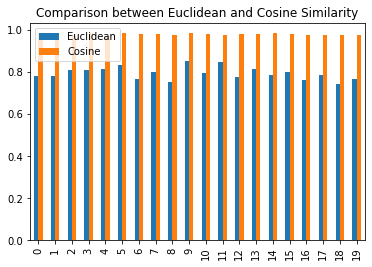

In [75]:
# Comparison between euclidean and cosine similarity shown as bar graph
accuracyTable.plot(kind='bar', title='Comparison between Euclidean and Cosine Similarity')

D) Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on text categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [110]:
# Get doc counts for each term
DF = pd.DataFrame([(TD!=0).sum(1)]).T

In [111]:
# Create a matrix with all entries = NDocs
NDocs = TD.shape[1]

NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs

np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [109]:
# Convert each entry into IDF term
IDF = np.log2(np.divide(NMatrix, np.array(DF)))

print(IDF)

[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 ...
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]
 [8.64 8.64 8.64 ... 8.64 8.64 8.64]]


In [108]:
# Compute TFxIDF values for each term
TD_tfidf = TD * IDF
pd.set_option("display.precision", 2)

TD_tfidf

array([[ 8.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [13.67,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [12.64,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [112]:
euclideanListTFxIDF = []
cosineListTFxIDF = []
resultsTFxIDF = {}

for i in range(20):
    euc = classAccuracy(TD_tfidf.T, i+1, 0, testLabels)
    cos = classAccuracy(TD_tfidf.T, i+1, 1, testLabels)
    euclideanListTFxIDF.append(euc)
    cosineListTFxIDF.append(cos)

In [113]:
resultsTFxIDF["Euclidean"] = euclideanListTFxIDF
resultsTFxIDF["Cosine"] = cosineListTFxIDF

# Comparison between euclidean and cosine similarity shown as a table
accuracyTableTFxIDF = pd.DataFrame(resultsTFxIDF, columns=['Euclidean', 'Cosine'])
accuracyTableTFxIDF

,Euclidean,Cosine
0,0.52,0.97
1,0.52,0.97
2,0.52,0.98
3,0.52,0.98
4,0.53,0.97
5,0.55,0.98
6,0.50,0.98
7,0.51,0.99
8,0.50,0.99
9,0.51,0.99


<AxesSubplot:title={'center':'Comparison between Euclidean and Cosine Similarity with TFxIDF weights'}>

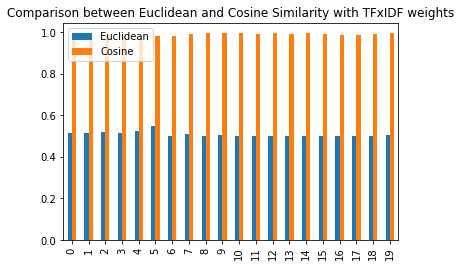

In [115]:
accuracyTableTFxIDF.plot(kind='bar', title='Comparison between Euclidean and Cosine Similarity with TFxIDF weights')

When comparing the K results between those weighted with TFxIDF and those without, the results seem fairly identical when it comes to using cosine similarity. The values for cosine similarity and that use TFxIDF weights are slightly greater than those without TFxIDF weights because most of the values for the weighted results are around 0.99 while the unweighted results are mostly 0.98 and 0.97. There is a large difference for the euclidean values when comparing the TFxIDF weighted values and the unweighted ones. The weighted values are about half of the unweighted values as a majority of them are around 0.5 while the unweighted values range from 0.74 to 0.85. Therefore, it seems that it is more accurate to use euclidean distance with unweighted values as opposed to using TFxIDF weighted values.

E) Create a new classifier based on the Rocchio Method adapted for text categorization [See ]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [140]:
# Creating the training function separate from the classification function 
# that takes as input training data matrix and labels.
# Based on description in lecture slides.
# Couldn't get the entire part of this problem to work as I wasn't able to find anything online or in the example code that could help me in fixing my errors
# In the future I will make a greater effort to do more research for methods not in the example code
def rocchio_training(train_data, train_labels):
    numClass = np.unique(train_labels)
    prototypeVector = {}
    
    # For each class we want to get all of the indexes that match our class then get the rows that pertain to each matched class.
    # Then we add up the rows to get the prototype and add it to our prototype vector
    for (i, cls) in enumerate(numClass):
        indexes = np.array(train_labels.index[train_labels.iloc[:, 0] == cls])
        rows = train_data[indexes]
        prototype = np.sum(rows, axis=0)
        prototypeVector.update({i : prototype})
        
    return prototypeVector

In [141]:
# Classification function that takes in prototypes from the training function and the instance to be classified.
def rocchio_classification(prototypes, instance):
    cosineMax = -1
    proto = -1
    
    # get cosine similarity between prototype and instance then update the cosineMax if greater than current max.
    # Also update the prototype if the cosineMax is updated.
    for k, v in prototypes.items():
        cosine = dot(instance, v)/(norm(instance)*norm(v))
        cosineMax = max(cosineMax, cosine)
        if cosine > cosineMax:
            proto = k
    return proto

In [142]:
# Function to compute the classification accuracy using the test instances
def rocchio_compute(train_data, test_labels, prototypes):
    total = len(train_data)
    corr = 0
    
    for i in range(total):
        label = rocchio_classification(prototypes, train_data[i])
        if label == test_labels:
            corr += 1
    return corr/total

In [143]:
prototypes = rocchio_training(DTM_train, labels)

AttributeError: 'numpy.ndarray' object has no attribute 'index'